# IMPORTS

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
from tqdm import tqdm
import nltk
import re
from wordcloud import WordCloud
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
tqdm.pandas()


In [2]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dpate\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dpate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# DATA PREPROCESSING & EXPLORATION

In [3]:
# review_df = pd.read_json('yelp_academic_dataset_review.json', lines=True, chunksize=50000)
# review_df = pd.concat(review_df, ignore_index=True)

# review_df.head()

# business_df = pd.read_json('yelp_academic_dataset_business.json', lines=True, chunksize=50000)
# business_df = pd.concat(business_df, ignore_index=True)
# filtered_business_df = business_df[business_df['state'] == 'PA']
# business_df.head()

# filtered_reviews = review_df[review_df['business_id'].isin(filtered_business_df['business_id'])]
# filtered_reviews.head()

# filtered_reviews.to_csv('filtered_reviews_PA.csv', index=False)

In [ ]:
df = pd.read_csv('filtered_reviews_PA.csv', chunksize=10000)
df = pd.concat(df, ignore_index=True)
df.shape
df.head()

(1598960, 9)

In [11]:
sample_raw_df = df.sample(frac=0.001, random_state=42)
sample_raw_df.to_csv('test_raw_sample_reviews_PA.csv', index=False)
print(sample_raw_df.shape)
sample_raw_df.head()

(1599, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
737554,Yr4WyOqy0_pBvFH6PF3Urw,AVnWYR_8NIw_CQLwmf15Ww,soQy_ZAshde4KMv97htJNQ,5,4,0,0,I have spent a lot of time in New England. I h...,2014-01-24 03:35:00
1013933,Xc1yw5yTTZqduU0HCVC4PA,y_LS2MZJB7J9fUfRtEkV_w,NNZ4Zjir0S101ltpfgaI1w,4,2,0,1,I have try a few diners in the area and found ...,2011-06-11 11:52:00
1434674,nfbswsgWDGgOMh5Y4ePRrg,YgfPCJqTVNu8_58RZNH2vA,zf10JmXNZFljGl3IgWW-Lg,3,0,0,0,Went here to grab a quick lunch. Quaint locati...,2015-07-04 20:39:22
95598,cNfo6xW8O5hV0XtxkkamBw,cv71eqs8S3UmJCuK6fBfQg,LdK6Tqr9-QK8eNezCUes9A,5,0,0,0,"Breakfast is the best meal of the day, and Mel...",2019-08-06 12:16:46
1170304,LESGZEjQFZV4gmI9j3giRg,5OfigdtYxKfyFpgt8YAQDA,_55pMRf55YS9qecJdN4iUA,3,0,0,0,"Thanks for the whopping 2 posts. LOL, what can...",2010-06-11 14:47:07


In [6]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into string
    return ' '.join(tokens)

In [7]:
# preprocessed_df = df.copy()
# preprocessed_df['text'] = preprocessed_df['text'].progress_apply(preprocess_text)
# preprocessed_df.head()

In [8]:
# preprocessed_df.to_csv('preprocessed_reviews_PA.csv', index=False)

In [7]:
preprocessed_df = pd.read_csv('preprocessed_reviews_PA.csv')
print(preprocessed_df.shape)
preprocessed_df.head()

(1598960, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,decide eat aware going take 2 hours beginning ...,2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,ive taken lot spin classes years nothing compa...,2012-01-03 15:28:18
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,wow yummy different delicious favorite lamb cu...,2015-01-04 00:01:03
3,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,long term frequent customer establishment went...,2015-09-23 23:10:31
4,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,amazingly amazing wings homemade bleu cheese r...,2015-08-07 02:29:16


In [10]:
# preprocessed_df.shape

# sample_df = preprocessed_df.sample(frac=0.1, random_state=42)
# sample_df.to_csv('sample_reviews_PA.csv', index=False)
# sample_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
737554,Yr4WyOqy0_pBvFH6PF3Urw,AVnWYR_8NIw_CQLwmf15Ww,soQy_ZAshde4KMv97htJNQ,5,4,0,0,spent lot time new england never seen lobster ...,2014-01-24 03:35:00
1013933,Xc1yw5yTTZqduU0HCVC4PA,y_LS2MZJB7J9fUfRtEkV_w,NNZ4Zjir0S101ltpfgaI1w,4,2,0,1,try diners area found one best fast service mo...,2011-06-11 11:52:00
1434674,nfbswsgWDGgOMh5Y4ePRrg,YgfPCJqTVNu8_58RZNH2vA,zf10JmXNZFljGl3IgWW-Lg,3,0,0,0,went grab quick lunch quaint location good sus...,2015-07-04 20:39:22
95598,cNfo6xW8O5hV0XtxkkamBw,cv71eqs8S3UmJCuK6fBfQg,LdK6Tqr9-QK8eNezCUes9A,5,0,0,0,breakfast best meal day mel team right excelle...,2019-08-06 12:16:46
1170304,LESGZEjQFZV4gmI9j3giRg,5OfigdtYxKfyFpgt8YAQDA,_55pMRf55YS9qecJdN4iUA,3,0,0,0,thanks whopping 2 posts lol one expect town li...,2010-06-11 14:47:07


In [10]:
sample_df = preprocessed_df.sample(frac=0.001, random_state=42)
sample_df.to_csv('test_sample_reviews_PA.csv', index=False)
print(sample_df.shape)
sample_df.head()

(1599, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
737554,Yr4WyOqy0_pBvFH6PF3Urw,AVnWYR_8NIw_CQLwmf15Ww,soQy_ZAshde4KMv97htJNQ,5,4,0,0,spent lot time new england never seen lobster ...,2014-01-24 03:35:00
1013933,Xc1yw5yTTZqduU0HCVC4PA,y_LS2MZJB7J9fUfRtEkV_w,NNZ4Zjir0S101ltpfgaI1w,4,2,0,1,try diners area found one best fast service mo...,2011-06-11 11:52:00
1434674,nfbswsgWDGgOMh5Y4ePRrg,YgfPCJqTVNu8_58RZNH2vA,zf10JmXNZFljGl3IgWW-Lg,3,0,0,0,went grab quick lunch quaint location good sus...,2015-07-04 20:39:22
95598,cNfo6xW8O5hV0XtxkkamBw,cv71eqs8S3UmJCuK6fBfQg,LdK6Tqr9-QK8eNezCUes9A,5,0,0,0,breakfast best meal day mel team right excelle...,2019-08-06 12:16:46
1170304,LESGZEjQFZV4gmI9j3giRg,5OfigdtYxKfyFpgt8YAQDA,_55pMRf55YS9qecJdN4iUA,3,0,0,0,thanks whopping 2 posts lol one expect town li...,2010-06-11 14:47:07


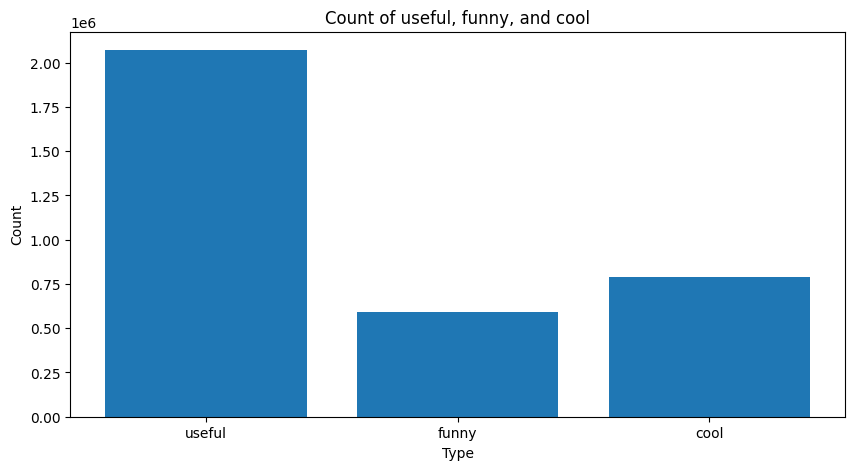

In [11]:
useful = preprocessed_df['useful'].sum()
funny = preprocessed_df['funny'].sum()
cool = preprocessed_df['cool'].sum()

plt.figure(figsize=(10, 5))
plt.bar(['useful', 'funny', 'cool'], [useful, funny, cool])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of useful, funny, and cool')
plt.show()


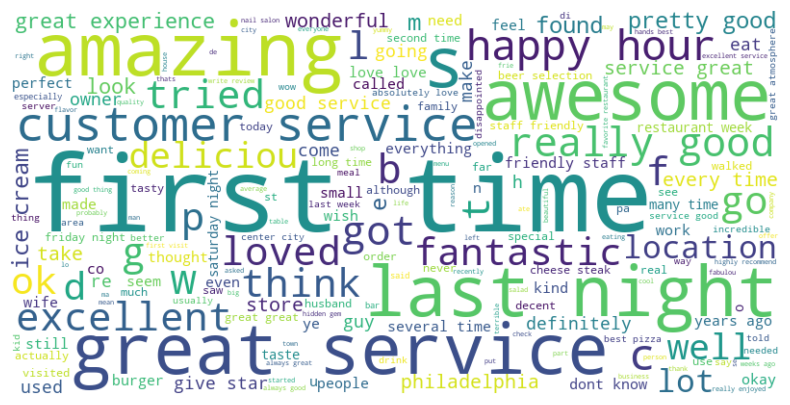

In [12]:
pp_text = preprocessed_df['text']

# Define custom words to filter out
custom_stop_words = {'food', 'place', 'one', 'ive'}
# Filter out custom words from text
pp_text = pp_text.apply(lambda x: ' '.join([word for word in str(x).split() if word not in custom_stop_words]))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pp_text.to_string())

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



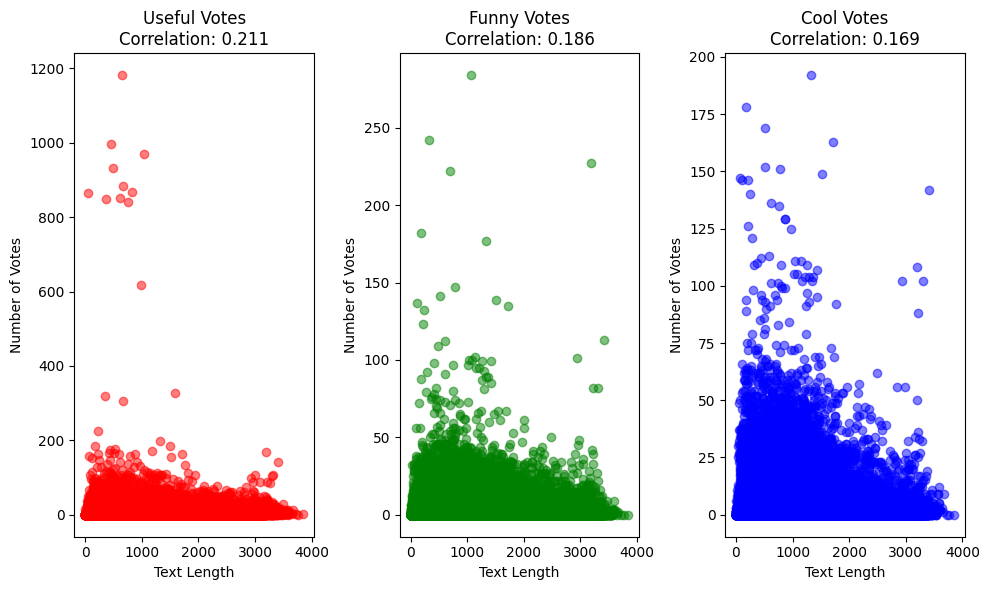

In [13]:
# Create scatter plots comparing text length vs useful/funny/cool votes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,6))

# Calculate text lengths
text_lengths = preprocessed_df['text'].str.len()

# Calculate correlation coefficients
test_useful_corr = np.corrcoef(text_lengths.fillna(0), preprocessed_df['useful'].fillna(0))[0,1]
test_funny_corr = np.corrcoef(text_lengths.fillna(0), preprocessed_df['funny'].fillna(0))[0,1]
test_cool_corr = np.corrcoef(text_lengths.fillna(0), preprocessed_df['cool'].fillna(0))[0,1]

# Plot useful votes
ax1.scatter(text_lengths, preprocessed_df['useful'], color='red', alpha=0.5)
ax1.set_xlabel('Text Length')
ax1.set_ylabel('Number of Votes')
ax1.set_title(f'Useful Votes\nCorrelation: {test_useful_corr:.3f}')

# Plot funny votes
ax2.scatter(text_lengths, preprocessed_df['funny'], color='green', alpha=0.5)
ax2.set_xlabel('Text Length') 
ax2.set_ylabel('Number of Votes')
ax2.set_title(f'Funny Votes\nCorrelation: {test_funny_corr:.3f}')

# Plot cool votes
ax3.scatter(text_lengths, preprocessed_df['cool'], color='blue', alpha=0.5)
ax3.set_xlabel('Text Length')
ax3.set_ylabel('Number of Votes') 
ax3.set_title(f'Cool Votes\nCorrelation: {test_cool_corr:.3f}')

plt.tight_layout()
plt.show()

In [14]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<Axes: >

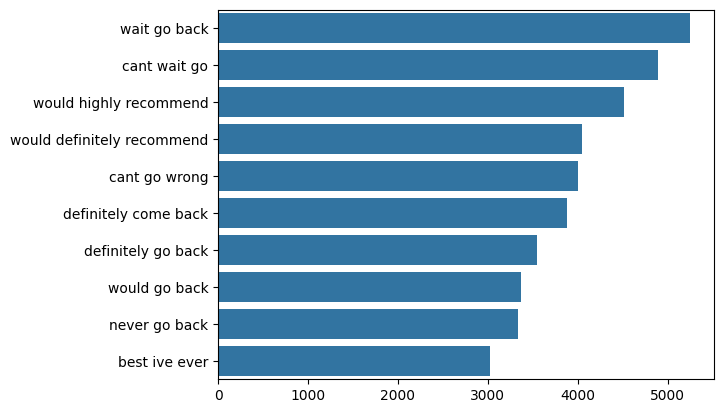

In [15]:
pp_text_useful = preprocessed_df[preprocessed_df['useful'] > 0]['text']

# Remove any rows with NaN values
pp_text_useful = pp_text_useful.dropna()


top_ngrams = get_top_ngram(pp_text_useful, 3)
x,y=map(list,zip(*top_ngrams))
sns.barplot(x=y,y=x)

<Axes: >

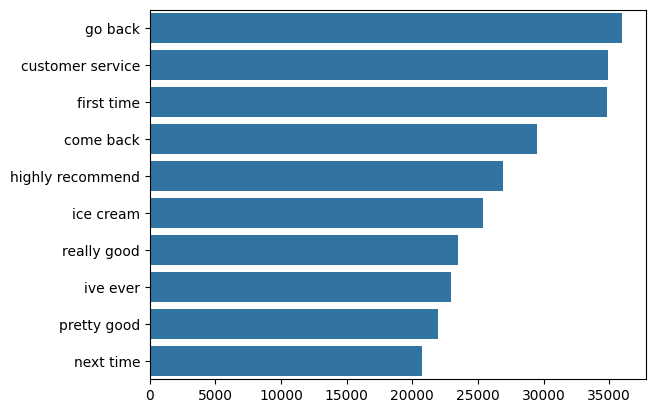

In [16]:
top_ngrams = get_top_ngram(pp_text_useful, 2)
x,y=map(list,zip(*top_ngrams))
sns.barplot(x=y,y=x)

<Axes: >

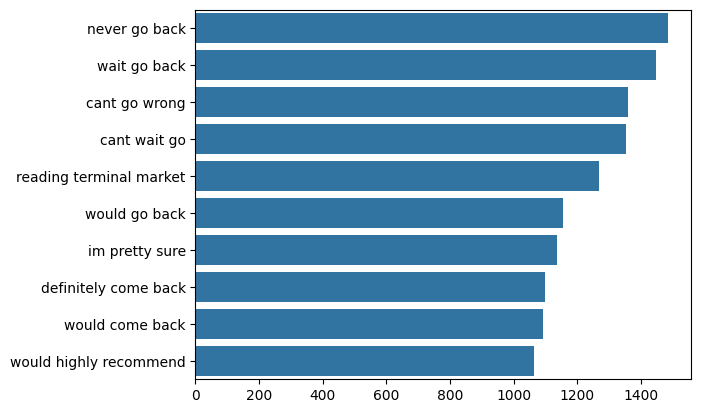

In [17]:
pp_text_funny = preprocessed_df[preprocessed_df['funny'] > 0]['text']
pp_text_funny = pp_text_funny.dropna()

top_ngrams = get_top_ngram(pp_text_funny, 3)
x,y=map(list,zip(*top_ngrams))
sns.barplot(x=y,y=x)


<Axes: >

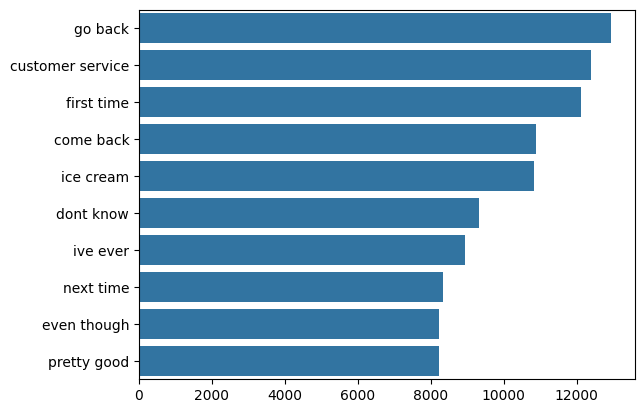

In [18]:
top_ngrams = get_top_ngram(pp_text_funny, 2)
x,y=map(list,zip(*top_ngrams))
sns.barplot(x=y,y=x)

<Axes: >

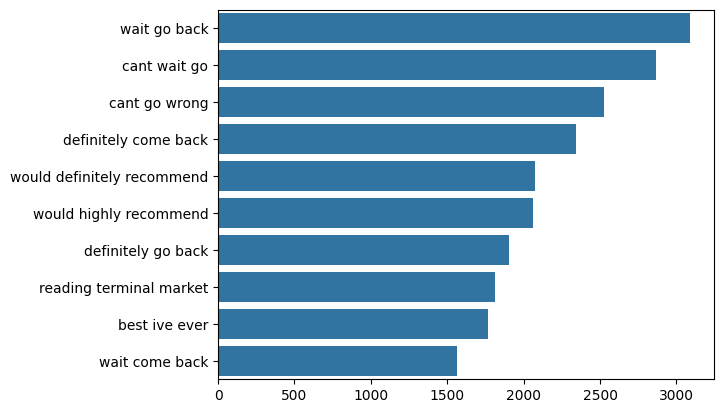

In [19]:
pp_text_cool = preprocessed_df[preprocessed_df['cool'] > 0]['text']
pp_text_cool = pp_text_cool.dropna()
top_ngrams = get_top_ngram(pp_text_cool, 3)
x,y=map(list,zip(*top_ngrams))
sns.barplot(x=y,y=x)


<Axes: >

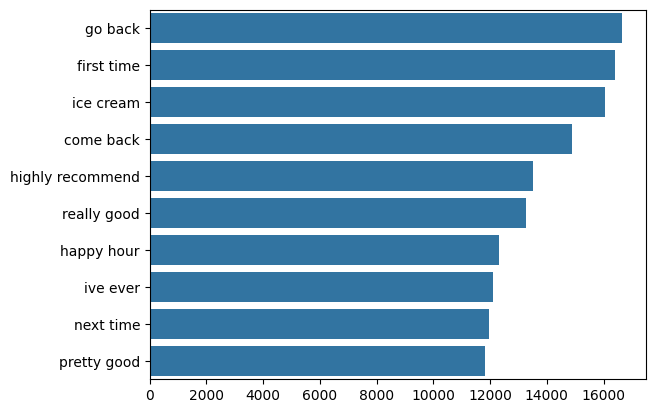

In [20]:
top_ngrams = get_top_ngram(pp_text_cool, 2)
x,y=map(list,zip(*top_ngrams))
sns.barplot(x=y,y=x)

# MACHINE LEARNING MODEL

### Load Data

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import TrainingArguments, Trainer, AutoModelForSequenceClassification, AutoTokenizer
from sklearn.model_selection import train_test_split

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using deivce: ', device)

Using deivce:  cuda


In [15]:
data_path = 'filtered_reviews_PA.csv'
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(1598960, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
3,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
4,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16


### Normalize Features & Drop Columns

In [16]:
df = df.drop(columns=['review_id', 'user_id', 'business_id', 'stars', 'date'])

In [52]:
df['useful'] = (df['useful'] > 0).astype(int)
df['funny'] = (df['funny'] > 0).astype(int)
df['cool'] = (df['cool'] > 0).astype(int)
df.head()

useful_df = df[['useful', 'text']]
funny_df = df[['funny', 'text']]
cool_df = df[['cool', 'text']]


In [37]:
useful_sample_df = useful_df.sample(frac=0.01, random_state=42)
funny_sample_df = funny_df.sample(frac=0.01, random_state=42)
cool_sample_df = cool_df.sample(frac=0.01, random_state=42)

In [38]:
test_df_useful, train_df_useful = train_test_split(useful_sample_df, test_size=0.2, random_state=42)
test_df_funny, train_df_funny = train_test_split(funny_sample_df, test_size=0.2, random_state=42)
test_df_cool, train_df_cool = train_test_split(cool_sample_df, test_size=0.2, random_state=42)

In [55]:
# Process useful labels
train_text_useful = train_df_useful['text'].values.tolist()
train_labels_useful = train_df_useful['useful'].values.tolist()

test_text_useful = test_df_useful['text'].values.tolist()
test_labels_useful = test_df_useful['useful'].values.tolist()

# Process funny labels
train_text_funny = train_df_funny['text'].values.tolist()
train_labels_funny = train_df_funny['funny'].values.tolist()

test_text_funny = test_df_funny['text'].values.tolist()
test_labels_funny = test_df_funny['funny'].values.tolist()

# Process cool labels
train_text_cool = train_df_cool['text'].values.tolist()
train_labels_cool = train_df_cool['cool'].values.tolist()

test_text_cool = test_df_cool['text'].values.tolist()
test_labels_cool = test_df_cool['cool'].values.tolist()

In [56]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

# Useful encodings
train_encodings_useful = tokenizer(train_text_useful, truncation=True, padding="max_length", max_length=512)
eval_encodings_useful = tokenizer(test_text_useful, truncation=True, padding="max_length", max_length=512)

# Funny encodings
train_encodings_funny = tokenizer(train_text_funny, truncation=True, padding="max_length", max_length=512)
eval_encodings_funny = tokenizer(test_text_funny, truncation=True, padding="max_length", max_length=512)

# Cool encodings
train_encodings_cool = tokenizer(train_text_cool, truncation=True, padding="max_length", max_length=512)
eval_encodings_cool = tokenizer(test_text_cool, truncation=True, padding="max_length", max_length=512)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\git\wpi\nlp\venv\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dpate\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [57]:
class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels  # Convert to list to avoid DataFrame issues

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Changed to long tensor for single label
        return item

    def __len__(self):
        return len(self.labels)

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

def compute_metrics(p):
    predictions, labels = p.predictions, p.label_ids
    predictions = np.argmax(predictions, axis=1)
    
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='binary')
    precision = precision_score(labels, predictions, average='binary')
    recall = recall_score(labels, predictions, average='binary')
    
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [72]:
train_dataset_funny = ReviewDataset(train_encodings_funny, train_labels_funny)
eval_dataset_funny = ReviewDataset(eval_encodings_funny, test_labels_funny)

train_dataset_cool = ReviewDataset(train_encodings_cool, train_labels_cool)
eval_dataset_cool = ReviewDataset(eval_encodings_cool, test_labels_cool)

train_dataset_useful = ReviewDataset(train_encodings_useful, train_labels_useful)
eval_dataset_useful = ReviewDataset(eval_encodings_useful, test_labels_useful)

In [73]:
bert = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased')
bert = bert.to(device)

# Create an instance of TrainingArguments to configure the training process
training_args = TrainingArguments(
    output_dir='./results',  # Directory where the model predictions and checkpoints will be saved
    num_train_epochs=5,  # Number of times the model will be trained on the entire training dataset
    per_device_train_batch_size=16,  # Batch size for training on each device (GPU/CPU)
    per_device_eval_batch_size=16,  # Batch size for evaluation on each device
    warmup_steps=500,  # Number of steps for the learning rate warmup
    weight_decay=0.01,  # Weight decay to apply (if any) for regularization
    logging_dir='./logs',  # Directory for storing logs
    logging_steps=5000,  # Log training metrics every 5000 steps
    eval_strategy="epoch",  # Evaluation strategy to adopt during training (evaluate at the end of each epoch)
    save_strategy="epoch",  # Save strategy to adopt during training (save at the end of each epoch)
    load_best_model_at_end=True,  # Load the best model when finished training (based on evaluation metrics)
    gradient_accumulation_steps=2,  # Number of updates steps to accumulate before performing a backward/update pass
    fp16=True  # Enable mixed precision training
)

funny_trainer = Trainer(
    model=bert,
    args=training_args,
    train_dataset=train_dataset_funny,
    eval_dataset=eval_dataset_funny,
    compute_metrics=compute_metrics
)

cool_trainer = Trainer(
    model=bert,
    args=training_args,
    train_dataset=train_dataset_cool,
    eval_dataset=eval_dataset_cool,
    compute_metrics=compute_metrics
)

useful_trainer = Trainer(
    model=bert,
    args=training_args,
    train_dataset=train_dataset_useful,
    eval_dataset=eval_dataset_useful,
    compute_metrics=compute_metrics
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [74]:
funny_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.437754,0.823718,0.000000,0.000000,0.000000
2,No log,0.428088,0.827783,0.085513,0.668831,0.045676
3,No log,0.476236,0.828956,0.094371,0.708075,0.050554
4,No log,0.504851,0.791588,0.375644,0.398015,0.355654
5,No log,0.665855,0.805034,0.269050,0.396716,0.203548


c:\git\wpi\nlp\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=500, training_loss=0.3610822143554687, metrics={'train_runtime': 198.2043, 'train_samples_per_second': 80.674, 'train_steps_per_second': 2.523, 'total_flos': 2118153704509440.0, 'train_loss': 0.3610822143554687, 'epoch': 5.0})

In [75]:
cool_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.499743,0.779706,0.161808,0.573840,0.094183
2,No log,0.500148,0.779159,0.111356,0.608247,0.061288
3,No log,0.501902,0.771732,0.349086,0.489987,0.271122
4,No log,0.567015,0.761882,0.277514,0.440512,0.202562
5,No log,0.647354,0.731082,0.347249,0.384131,0.316828


TrainOutput(global_step=500, training_loss=0.4334722900390625, metrics={'train_runtime': 199.2217, 'train_samples_per_second': 80.262, 'train_steps_per_second': 2.51, 'total_flos': 2118153704509440.0, 'train_loss': 0.4334722900390625, 'epoch': 5.0})

In [76]:
useful_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.649962,0.628987,0.585575,0.629553,0.547339
2,No log,0.647343,0.628831,0.582630,0.631238,0.540973
3,No log,0.697133,0.585600,0.652781,0.545126,0.813418
4,No log,0.718126,0.597952,0.613686,0.568387,0.666830
5,No log,0.949843,0.581614,0.475500,0.594899,0.396017


TrainOutput(global_step=500, training_loss=0.563117431640625, metrics={'train_runtime': 199.3387, 'train_samples_per_second': 80.215, 'train_steps_per_second': 2.508, 'total_flos': 2118153704509440.0, 'train_loss': 0.563117431640625, 'epoch': 5.0})

In [77]:
funny_metrics = funny_trainer.compute_metrics
cool_metrics = cool_trainer.compute_metrics
useful_metrics = useful_trainer.compute_metrics

print(funny_metrics)
print(cool_metrics)
print(useful_metrics)

<function compute_metrics at 0x0000020F52C40400>
<function compute_metrics at 0x0000020F52C40400>
<function compute_metrics at 0x0000020F52C40400>


In [78]:
# Save the trained models
funny_trainer.save_model("models/funny_model")
cool_trainer.save_model("models/cool_model") 
useful_trainer.save_model("models/useful_model")

# Save the tokenizer as well
tokenizer.save_pretrained("models/funny_model")
tokenizer.save_pretrained("models/cool_model")
tokenizer.save_pretrained("models/useful_model")


('models/useful_model\\tokenizer_config.json',
 'models/useful_model\\special_tokens_map.json',
 'models/useful_model\\vocab.txt',
 'models/useful_model\\added_tokens.json',
 'models/useful_model\\tokenizer.json')